In [1]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress
from scipy.stats import sem

# Functions

In [2]:
def _filter_by_sex(df, sex):
    if sex is None: 
        filtered_df = df
    else:    
        filtered_df = df[df["sex"] == sex]
        
    return filtered_df

In [3]:
def plot_by_children(df, sex, color):
    filtered_df = _filter_by_sex(df, sex)

    # Group by number of children and mean BMI for each group
    avg_df = filtered_df.groupby('children')['bmi'].mean().reset_index()

    plt.figure(figsize=(10, 6))
    plt.bar(avg_df['children'], avg_df['bmi'], color=color)
    plt.xlabel('Number of Children')
    plt.ylabel('Average BMI (min. 29)')
    plt.title('Average BMI by Number of Children')
    plt.xticks(avg_df['children'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(29, 32)

    plt.show()

In [4]:
def plot_by_bmi(df, sex, color):
    filtered_df = _filter_by_sex(df, sex)
    
    # Group by number of children and mean BMI for each group
    bmi0_avg_df = filtered_df.groupby('bmi0')['children'].mean().reset_index()

    plt.figure(figsize=(10, 6))
    plt.bar(bmi0_avg_df['bmi0'], bmi0_avg_df['children'], color=color)
    plt.xlabel('Average BMI')
    plt.ylabel('Average Number of Children')
    plt.title(f'Average Number of Children by BMI ({sex if sex else "All"})')
    plt.xticks(bmi0_avg_df['bmi0'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0, 2.5)
    
    plt.show()

In [5]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from slope and intercept.
    regress_values = x_values * slope + intercept
    # Write line equation for y=mx+b
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    # Create scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Populate line equation and labels for plot
    plt.annotate(line_eq, text_coordinates, fontsize=10, color="red")
    plt.title(title)
    plt.xlabel('Charges')
    plt.ylabel(y_label)

    #Print r value
    print(f"The r-value is: {r_value**2}")
    plt.show()   

# Plots

In [6]:
# Source: https://www.kaggle.com/datasets/joebeachcapital/medical-insurance-costs
insurance_file = "insurance.csv" 
insurance_df = pd.read_csv(insurance_file)
insurance_df['bmi0'] = insurance_df['bmi'].round(0)
print(insurance_df.shape)
insurance_df.head(3)

(1338, 8)


,age,sex,bmi,children,smoker,region,charges,bmi0
0,19,female,27.90,0,yes,southwest,16884.9240,28.0
1,18,male,33.77,1,no,southeast,1725.5523,34.0
2,28,male,33.00,3,no,southeast,4449.4620,33.0


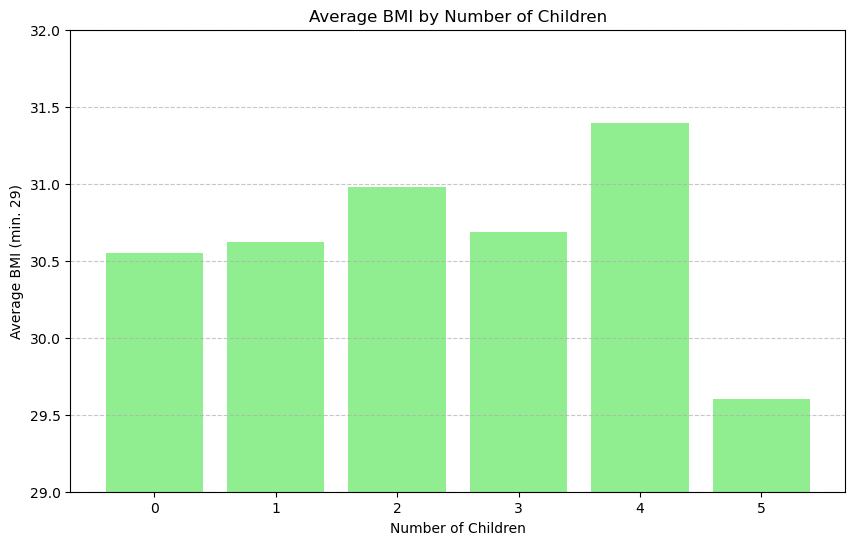

In [7]:
plot_by_children(insurance_df, None, "lightgreen")

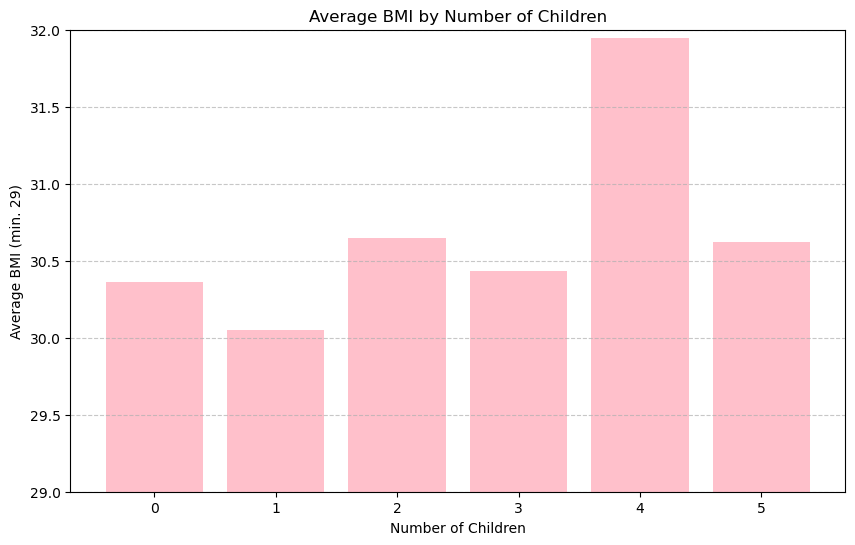

In [8]:
plot_by_children(insurance_df, "female", "pink")

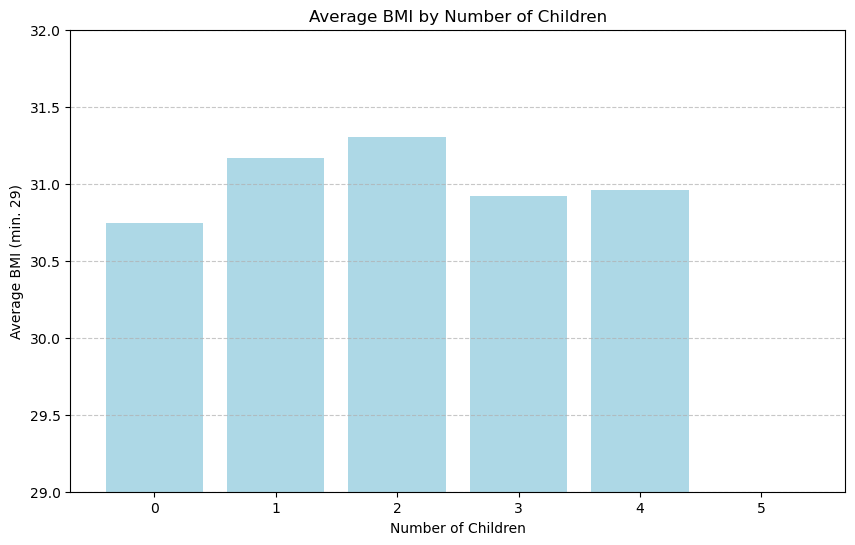

In [9]:
plot_by_children(insurance_df, "male", "lightblue")

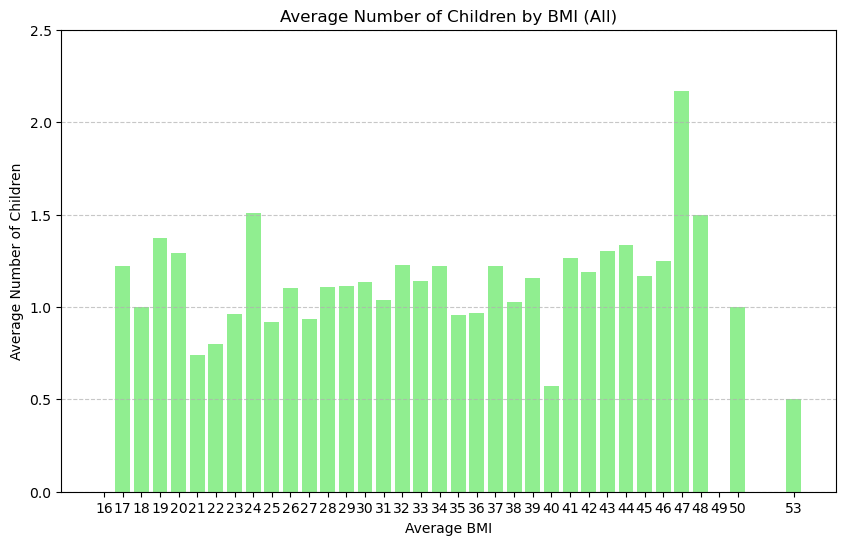

In [10]:
plot_by_bmi(insurance_df, None, "lightgreen")

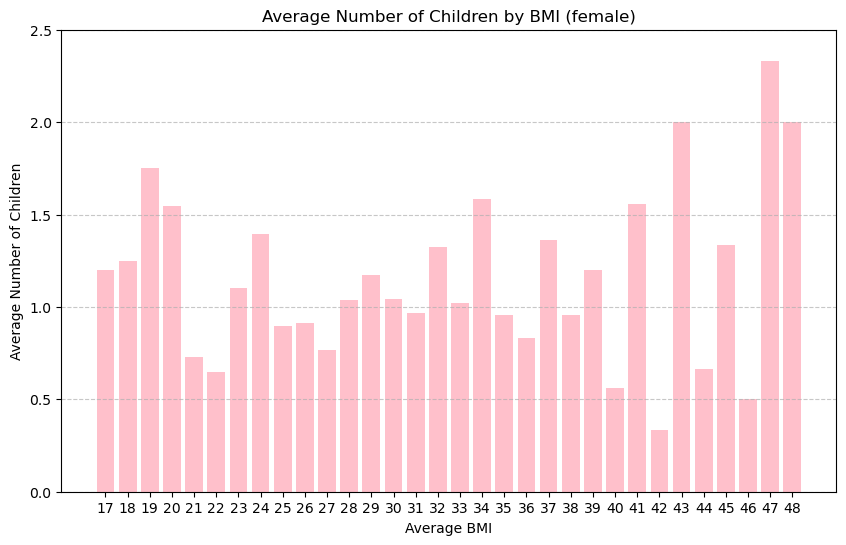

In [11]:
plot_by_bmi(insurance_df, "female", "pink")

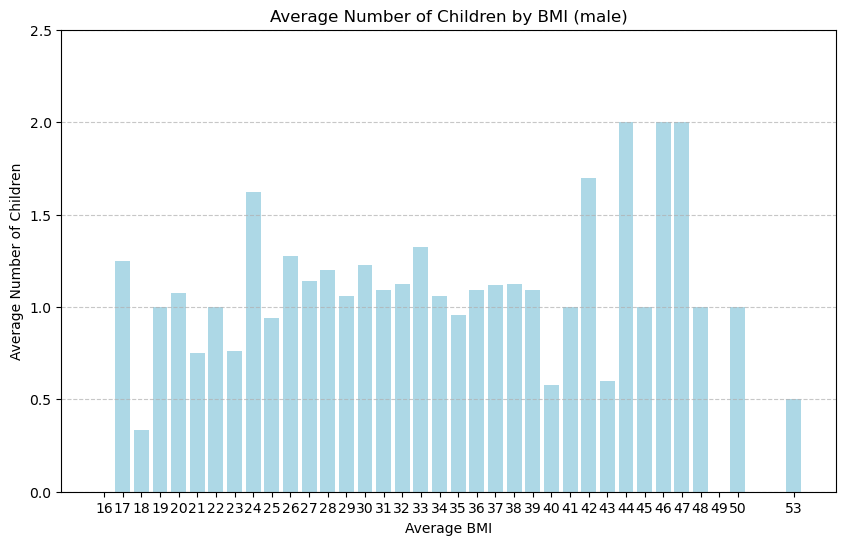

In [12]:
plot_by_bmi(insurance_df, "male", "lightblue")

In [13]:
northeast_df = insurance_df.loc[insurance_df['region']== 'northeast']
northwest_df = insurance_df.loc[insurance_df['region']== 'northwest']
southeast_df = insurance_df.loc[insurance_df['region']== 'southeast']
southwest_df = insurance_df.loc[insurance_df['region']== 'southwest']

The r-value is: 0.09057162483167437


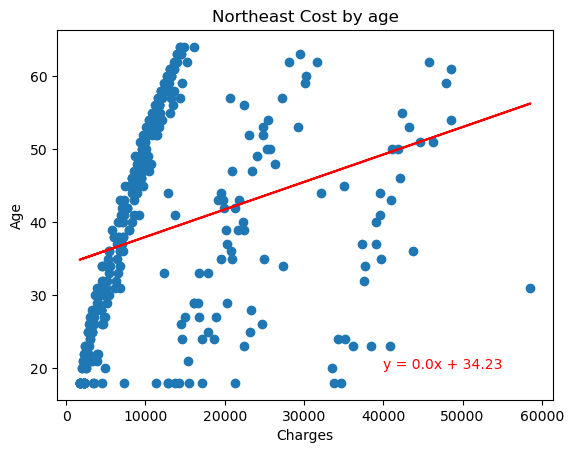

In [14]:
#plot NE

x_values = northeast_df['charges']
y_values = northeast_df['age']

plot_linear_regression(x_values, y_values, 'Northeast Cost by age', 'Age',(40000, 20) 
                                                                    )

The r-value is: 0.11401011735150318


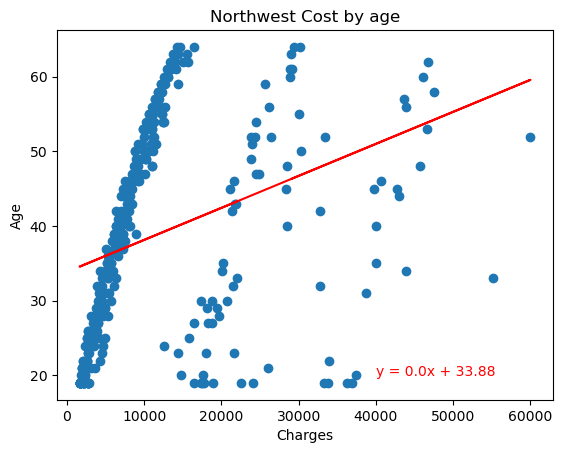

In [15]:
#Plot NW 

x_values = northwest_df['charges']
y_values = northwest_df['age']

plot_linear_regression(x_values, y_values, 'Northwest Cost by age', 'Age',(40000, 20) 
                                                                    )

The r-value is: 0.09646811059442471


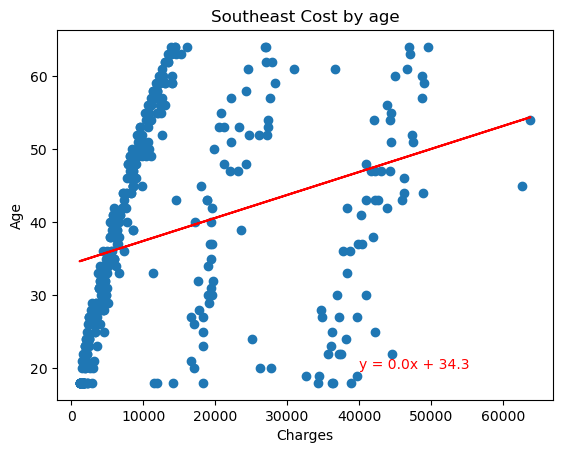

In [16]:
#Plot SE
x_values = southeast_df['charges']
y_values = southeast_df['age']

plot_linear_regression(x_values, y_values, 'Southeast Cost by age', 'Age',(40000, 20) 
                                                                    )

The r-value is: 0.06674879291871783


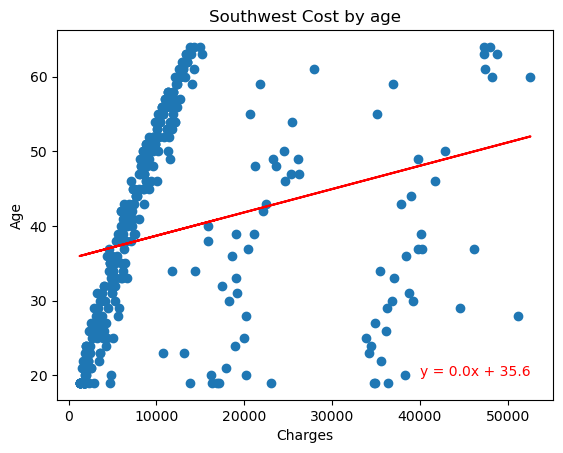

In [17]:
#Plot Southwest

x_values = southwest_df['charges']
y_values = southwest_df['age']

plot_linear_regression(x_values, y_values, 'Southwest Cost by age', 'Age',(40000, 20) 
                                                                    )

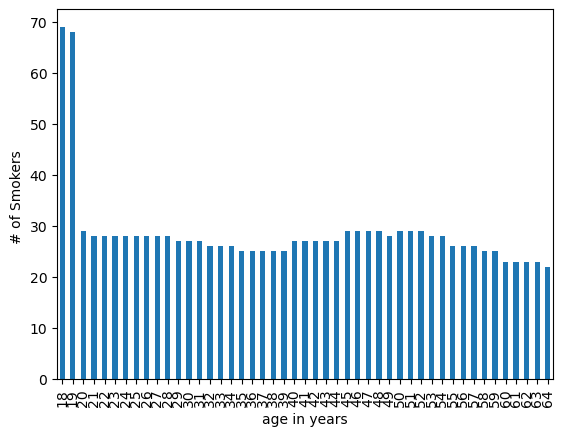

In [18]:
#grouping the smoker by age
smoker_age_df=insurance_df.groupby('age')['smoker'].count()
smoker_age_df.plot(kind='bar')
plt.ylabel("# of Smokers ")
plt.xlabel("age in years")

plt.show()

In [19]:
smoker_gender_df=insurance_df.groupby('sex')['smoker'].value_counts()
smoker_gender_df

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
Name: count, dtype: int64

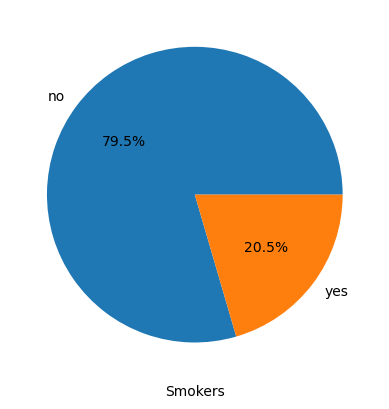

In [20]:
#number of smokers
smoker_df=insurance_df['smoker'].value_counts()
smoker_df.plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('')
plt.xlabel('Smokers')
plt.show()

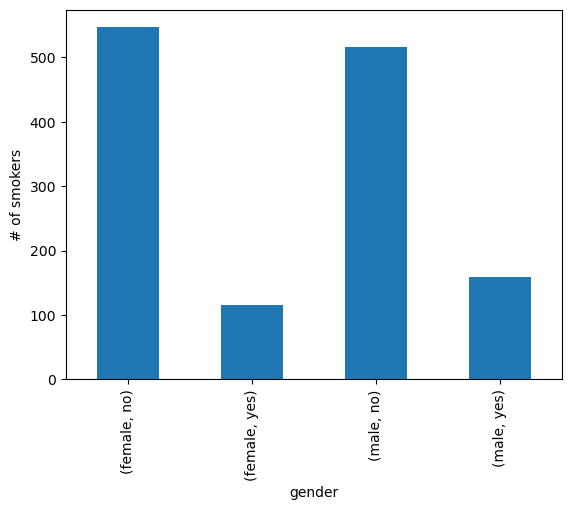

In [21]:
#Smokers gender wise
smoker_gender_df.plot(kind='bar')
plt.xlabel('gender')
plt.ylabel('# of smokers')
plt.show()